In [1]:
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import nltk
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
import logging
logging.getLogger('tensorflow').disabled = True

In [3]:
df = pd.read_csv('dataset/Luxury_Products_Apparel_Data.csv')
df.head()

,Unnamed: 0,Category,SubCategory,ProductName,Description
0,8037,Accessories,Bags,"""Prada Striped Shell Belt Bag""","""One of Prada's most functional designs, this ..."
1,13670,Accessories,Socks,"""Falke - Lhasa Wool And Cashmere-blend Socks -...","""Falke - Casual yet luxurious, Falke's dark na..."
2,13983,Suits,Tuxedos,"""peak lapel tuxedo suit jacket""","""White and black linen blend peak lapel tuxedo..."
3,12081,Accessories,Gloves,"""Thom Browne Navy 4-Bar Rib Gloves""","""Pair of rib knit cashmere gloves in navy. Sig..."
4,15617,Accessories,Cufflinks,"""Alice Made This - Bayley Round Patina-brass C...","""Alice Made This - Made in the UK, these teal ..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   5000 non-null   int64 
 1   Category     4963 non-null   object
 2   SubCategory  4963 non-null   object
 3   ProductName  5000 non-null   object
 4   Description  5000 non-null   object
dtypes: int64(1), object(4)
memory usage: 195.4+ KB


In [5]:
df.dropna(subset=['Category', 'Description'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4963 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   4963 non-null   int64 
 1   Category     4963 non-null   object
 2   SubCategory  4963 non-null   object
 3   ProductName  4963 non-null   object
 4   Description  4963 non-null   object
dtypes: int64(1), object(4)
memory usage: 232.6+ KB


In [6]:
selected_columns = ['Description', 'Category']
df = df[selected_columns]
df.head()

,Description,Category
0,"""One of Prada's most functional designs, this ...",Accessories
1,"""Falke - Casual yet luxurious, Falke's dark na...",Accessories
2,"""White and black linen blend peak lapel tuxedo...",Suits
3,"""Pair of rib knit cashmere gloves in navy. Sig...",Accessories
4,"""Alice Made This - Made in the UK, these teal ...",Accessories


In [7]:
labels = pd.get_dummies(df.Category)
df = pd.concat([df, labels], axis=1)
df = df.drop(columns='Category')
df

,Description,Accessories,Activewear,Jackets/Coats,Jewelry,Pants,Shirts,Shoes,Suits,Sweaters,Underwear and Nightwear
0,"""One of Prada's most functional designs, this ...",True,False,False,False,False,False,False,False,False,False
1,"""Falke - Casual yet luxurious, Falke's dark na...",True,False,False,False,False,False,False,False,False,False
2,"""White and black linen blend peak lapel tuxedo...",False,False,False,False,False,False,False,True,False,False
3,"""Pair of rib knit cashmere gloves in navy. Sig...",True,False,False,False,False,False,False,False,False,False
4,"""Alice Made This - Made in the UK, these teal ...",True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
4995,"""Leather upper. Concealed front lace-up closur...",False,False,False,False,False,False,True,False,False,False
4996,"""Swiss-made PVD-coated stainless steel two-han...",False,False,False,True,False,False,False,False,False,False
4997,"""Bordeaux red leather two tone braces from Fef...",True,False,False,False,False,False,False,False,False,False
4998,"""Valentino - Crafted in lightweight virgin-woo...",False,True,False,False,False,False,False,False,False,False


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4963 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Description              4963 non-null   object
 1   Accessories              4963 non-null   bool  
 2   Activewear               4963 non-null   bool  
 3   Jackets/Coats            4963 non-null   bool  
 4   Jewelry                  4963 non-null   bool  
 5   Pants                    4963 non-null   bool  
 6   Shirts                   4963 non-null   bool  
 7   Shoes                    4963 non-null   bool  
 8   Suits                    4963 non-null   bool  
 9   Sweaters                 4963 non-null   bool  
 10  Underwear and Nightwear  4963 non-null   bool  
dtypes: bool(10), object(1)
memory usage: 126.0+ KB


In [9]:
nltk.download('stopwords')
nltk.download('punkt')

def preprocess_text(text):

    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if word.lower() not in stop_words]
    words = [word for word in words if word.isalnum()]
    preprocessed_text = ' '.join(words)

    return preprocessed_text

products = df['Description'].apply(preprocess_text).values
labels = df[['Accessories', 'Activewear', 'Jackets/Coats', 'Jewelry', 'Pants',
            'Shirts', 'Shoes', 'Suits', 'Sweaters', 'Underwear and Nightwear']].values

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [10]:
products_train, products_test, labels_train, labels_test = train_test_split(products, labels, test_size=0.2)

In [11]:
tokenizer = Tokenizer(num_words=1250, oov_token='-')
tokenizer.fit_on_texts(products_train)

sequence_train = tokenizer.texts_to_sequences(products_train)
sequence_test = tokenizer.texts_to_sequences(products_test)

padded_train = pad_sequences(sequence_train)
padded_test = pad_sequences(sequence_test)

In [12]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=1250, output_dim=16),
    tf.keras.layers.LSTM(64),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(10, activation='softmax')
])
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [13]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('accuracy') > 0.90 and logs.get('val_accuracy') > 0.90:
            self.model.stop_training = True
            print("\nAkurasi pelatihan dan validasi telah mencapai 90%!")
callbacks = myCallback()

num_epochs = 50
history = model.fit(padded_train, labels_train, batch_size=16, epochs=num_epochs,
                    validation_data=(padded_test, labels_test), verbose=2, callbacks=[callbacks])

Epoch 1/50
249/249 - 30s - loss: 1.8559 - accuracy: 0.2960 - val_loss: 1.3751 - val_accuracy: 0.5307 - 30s/epoch - 121ms/step
Epoch 2/50
249/249 - 24s - loss: 1.2799 - accuracy: 0.5156 - val_loss: 1.0739 - val_accuracy: 0.5992 - 24s/epoch - 98ms/step
Epoch 3/50
249/249 - 24s - loss: 1.0854 - accuracy: 0.5985 - val_loss: 0.9954 - val_accuracy: 0.6606 - 24s/epoch - 96ms/step
Epoch 4/50
249/249 - 24s - loss: 0.9348 - accuracy: 0.6657 - val_loss: 0.8445 - val_accuracy: 0.6878 - 24s/epoch - 98ms/step
Epoch 5/50
249/249 - 24s - loss: 0.8346 - accuracy: 0.7169 - val_loss: 0.7652 - val_accuracy: 0.7311 - 24s/epoch - 96ms/step
Epoch 6/50
249/249 - 24s - loss: 0.6724 - accuracy: 0.7557 - val_loss: 0.6892 - val_accuracy: 0.7633 - 24s/epoch - 96ms/step
Epoch 7/50
249/249 - 24s - loss: 0.6247 - accuracy: 0.7786 - val_loss: 0.6430 - val_accuracy: 0.7805 - 24s/epoch - 98ms/step
Epoch 8/50
249/249 - 25s - loss: 0.5754 - accuracy: 0.7970 - val_loss: 0.6599 - val_accuracy: 0.7835 - 25s/epoch - 101ms/ste

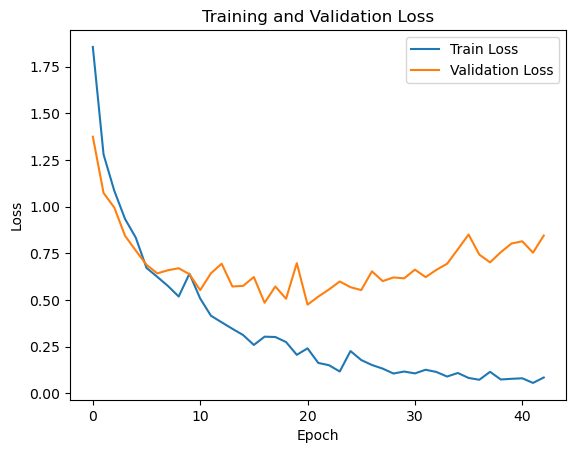

In [14]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

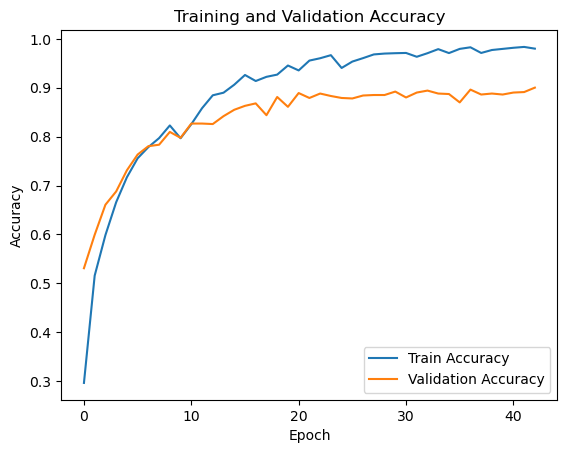

In [15]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()